# Ensemble Learning with Sklearn

© Explore Data Science Academy

## Learning Objectives

Within this train we will:

- Understand how to combine multiple models when making predictions.
- Implement an ensemble model using Sklearn.
- Understand differences between voting, stacking, boosting, and bagging.

## Outline

To meet our learning objectives, we'll be reviewing the following sections:

- What is Ensemble Learning?
- Building Individual Models
- Heterogeneous Ensembles
    - Voting
    - Stacking 
- Homogeneous Ensembles
    - Bagging
    - Boosting 


## What is Ensemble Learning?

Ensemble learning in machine learning is the practice of combining multiple models to try and achieve higher overall model performance. In general, ensembles consist of multiple **heterogeneous or homogeneous** models trained on the same dataset. Each of these models is used to make predictions on the same input, then these predictions are aggregated across all models in some way (e.g. by taking the mean) to produce the final output. A commonly used example of an ensemble model is a `Random Forest`. Random forests combine multiple homogeneous models (i.e. decision trees) in a clever way to make predictions.    

Other than the possibility of improving model performance, there are [lots of other reasons](https://towardsdatascience.com/simple-guide-for-ensemble-learning-methods-d87cc68705a2) why we might want to build an ensemble. In this train, we will explore some of the different ways of combining models in Sklearn. 

### Data loading
First let's load some data! 

We will use a version of [Kaggle's](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) house price regression data for predicting the price of a house given a set of variables.

<img src="https://github.com/Explore-AI/Public-Data/blob/master/house_price.png?raw=true" width=40% align="left"/>

In [1]:
import numpy as np  # Used for mathematical operations
import pandas as pd  # for loading CSV data
import matplotlib.pyplot as plt  # for plotting data
from sklearn.metrics import mean_squared_error # for checking performance

In [2]:
df = pd.read_csv(
    "https://github.com/Explore-AI/Public-Data/blob/master/house_price_by_area.csv?raw=true")
df.head()

,LotArea,SalePrice
0,138,1204000
1,145,1274000
2,152,1673000
3,152,1232000
4,152,1195600


The data we will be working with here consists of two variables:
 * `LotArea` in m$^{2}$
 * `SalePrice` in Rands
 
We will be using the value of `LotArea` (independent variable) to try and predict the `SalePrice` (dependent variable).   

Let's take a look at the data using `matplotlib`:

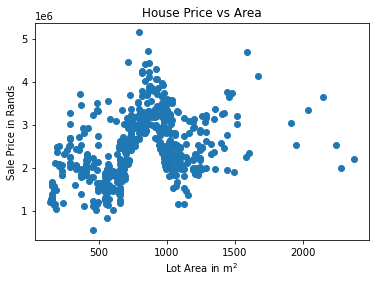

In [3]:
X = df["LotArea"] # Independent variable
y = df["SalePrice"] # Dependent variable

plt.scatter(X,y) # Create scatter plot
plt.title("House Price vs Area")
plt.xlabel("Lot Area in m$^2$")
plt.ylabel("Sale Price in Rands")
plt.show()

### Preprocessing

Next we split our dataset into training and testing sets so that we can later evaluate the performance of the model.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Normalise X and y
X_scaled = x_scaler.fit_transform(X[:,np.newaxis]) 
y_scaled = y_scaler.fit_transform(y[:,np.newaxis]) 

# Set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=6)

<ipython-input-5-084417312ec6>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_scaled = x_scaler.fit_transform(X[:,np.newaxis])
<ipython-input-5-084417312ec6>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_scaled = y_scaler.fit_transform(y[:,np.newaxis])


## Training the Individual Models

Next let's train multiple machine learning models on the same data. We'll train a `linear regression`, a `decision tree`, and an `SVR` (i.e. [Support Vector Machine Regressor](https://www.saedsayad.com/support_vector_machine_reg.htm) - *we'll explore this model in greater detail in later tutorials*)  model.  

### Linear Regression
Create and fit the model.

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
# Instantiate linear regression model
lin_reg = LinearRegression()

In [8]:
lin_reg.fit(x_train,y_train)

LinearRegression()

Check performance. Throughout the train we will use Root Mean Square Error (RMSE) as our metric. 

RMSE:  0.9597285404528205


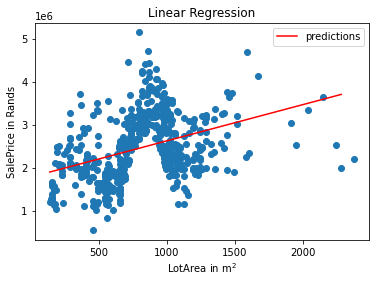

In [9]:
y_pred = lin_reg.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# Plot the linear regression prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(lin_reg.predict(x_domain))
x_rescaled = x_scaler.inverse_transform(x_domain) 

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("LotArea in m$^2$")
plt.ylabel("SalePrice in Rands")
plt.title("Linear Regression")
plt.legend()
plt.show()

### Decision Tree
Create and fit the model.

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=3)

In [12]:
regr_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

Check performance of the decision tree.

RMSE:  0.8155834161717601


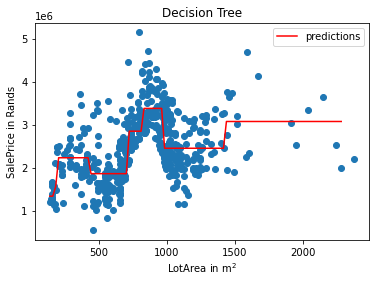

In [13]:
y_pred = regr_tree.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# Plot the regression tree prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(regr_tree.predict(x_domain))
x_rescaled = x_scaler.inverse_transform(x_domain) 

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("LotArea in m$^2$")
plt.ylabel("SalePrice in Rands")
plt.title("Decision Tree")
plt.legend()
plt.show()

### Support Vector Regressor
Create and fit the model.

In [14]:
from sklearn.svm import SVR

In [15]:
# Instantiate support vector regression model
sv_reg = SVR(kernel='rbf', gamma='auto')

In [16]:
sv_reg.fit(x_train,y_train[:,0])

SVR(gamma='auto')

Check performance of the SVR.

RMSE:  0.7823020808791088


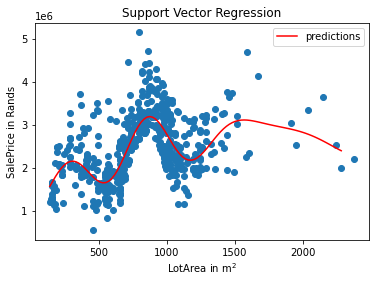

In [17]:
y_pred = sv_reg.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# Plot the SVR prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(sv_reg.predict(x_domain))
x_rescaled = x_scaler.inverse_transform(x_domain) 

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("LotArea in m$^2$")
plt.ylabel("SalePrice in Rands")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

## Heterogeneous Ensembles

This type of ensemble consists of different types of models, *so we can add pretty much  any regression model we want*.  

Here we investigate two ways of combining models which are different in nature. The first, and simpler of these two approaches is known as voting.   

### Voting
Voting involves combining individual model outputs through a kind of "[majority rule](https://en.wikipedia.org/wiki/Majority_rule)" paradigm. This process of prediction aggregation varies in the context of regression and classification tasks:
- Regression - we take the average or weighted average of all predictions.
- Classification - we use the mode of all predictions (i.e. most frequently occurring prediction).

Within the code below we instantiate such a voting ensemble using `Sklearn`'s `VotingRegressor` class. 

In [18]:
from sklearn.ensemble import VotingRegressor

In [19]:
# Define the models which we'll include in our ensemble. 
# We pass a list of tuples, which each have a string identifier for the
# model (arbitrary choice), along the actual instantiated sklearn model.  
models = [("LR",lin_reg),("DT",regr_tree),("SVR",sv_reg)]

# Specify weights for weighted model averaging
model_weightings = np.array([0.1,0.3,0.6])
v_reg = VotingRegressor(estimators=models,weights=model_weightings)

At this point, we have built a voting-based ensemble that combines:
- 10% of Linear Regression model output
- 30% of Decision Tree output
- 60% of Support Vector Regression output

to make a final prediction. 

Also note (from the following) that Sklearn saves all the input model hyper-parameters:

In [20]:
v_reg.fit(x_train,y_train[:,0])

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('DT', DecisionTreeRegressor(max_depth=3)),
                            ('SVR', SVR(gamma='auto'))],
                weights=array([0.1, 0.3, 0.6]))

Let's check the performance of the voting ensemble.

RMSE:  0.7804899566713737


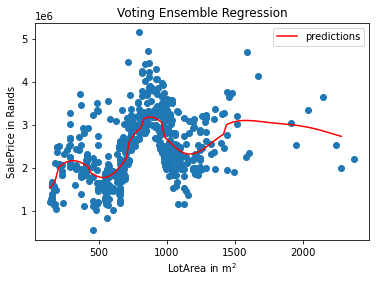

In [21]:
y_pred = v_reg.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# plot the voting regression prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(v_reg.predict(x_domain))
x_rescaled = x_scaler.inverse_transform(x_domain) 

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("LotArea in m$^2$")
plt.ylabel("SalePrice in Rands")
plt.title("Voting Ensemble Regression")
plt.legend()
plt.show()

There you have it, we managed to combine our initial three models in a way that improves overall performance.

---

### Try it yourself!

Within the above code we've provided weighted parameters for our voting ensemble which improve the overall performance of the regression task. There may be better weighings of these predictions, however, that improve the performance even further. 

**EXERCISE:** Try and run the above code cells now with **your own chosen weights** to see if you can beat the current score.

---

### Stacking 

<img src="https://github.com/Explore-AI/Pictures/blob/master/Model_stacking.png?raw=true" width=65%/>

While we hope that you enjoyed playing around with the voting weights in the previous section, you may have found the overall exercise frustrating due to the difficulty of knowing how your choice of weightings would affect the ensemble's performance. As such, a natural a question may have crossed your intelligent mind: 

*'What is a principled way of choosing the optimal voting weights for this ensemble?'*

If we take a step back, we can see that this question can actually be framed as another machine learning problem! After all, this entire time we have been looking at models which can accurately weight various variables in order to map them to an appropriate output. So what stops us from weighting the outputs of multiple *base models* with that of another model? 

The hierarchical approach we are alluding to above, where the outputs of multiple trained *base models* (sometimes called *base learners*) are fed into another model (referred to as a *meta model* or *meta learner*), is formally known as **Stacking**. 

We illustrate this process within the figure above, where we can see the predictions of base learners feeding into a meta learner. The training process is as follows (all handled by the stacking module):

    1. Each individual base learner is trained in turn on the same training dataset.
    
    2. A validation set is used to generate predictions on unseen observations from each of the trained base learners.
    
    3. These predictions - the outputs from the base learners - are used as the inputs for the meta learner model. The meta learner trains on these observations, using the labels from the validation set as the response variable.
    
<a title="Supun Setunga / CC BY-SA (https://creativecommons.org/licenses/by-sa/4.0)"><img width="640" alt="Stacking" src="https://upload.wikimedia.org/wikipedia/commons/d/de/Stacking.png"></a>

Training the meta learner effectively teaches it how to 'blend' the outputs of each of the base learners together to produce a single prediction.

Let's see how this works in `Sklearn`. To do so, we'll make use of the `StackingRegressor` class. 

In [22]:
# NB: The StackingRegressor has recently been made available 
# in version 0.22 of sklearn. Please use pip or conda to update your version 
# if this line throws an error. 
from sklearn.ensemble import StackingRegressor

In [23]:
# For clarity, we declare our model list again here 
models = [("LR",lin_reg),("DT",regr_tree),("SVR",sv_reg)]

# Instead of choosing model weightings, we now declare the meta learner 
# model for our stacking ensemble. 
# Here we choose to use a simple linear regression 
meta_learner_reg = LinearRegression()

s_reg = StackingRegressor(estimators=models, final_estimator=meta_learner_reg)

We now have our stacking ensemble declared. It contains our familiar base learners of Linear Regression, Regression Tree, and Support Vector Regression. 

We've also declared our meta learner as another Linear Regression model.  

Before we go on to fit our model and check its performance, it's important to understand what we're trading off by using stacking instead of simple voting in order to possibly improve our ensemble performance. Within the latter technique, once our base models are trained we can immediately get predictions to derive a final weighted prediction. Using stacking, however, we need two training passes: one for the base learners, and then another for the meta learner. This essentially means that we gain metric performance at the expense of extra computational requirements.    

Knowing this, let's go ahead and fit our model. 

In [24]:
s_reg.fit(x_train,y_train[:,0])

StackingRegressor(estimators=[('LR', LinearRegression()),
                              ('DT', DecisionTreeRegressor(max_depth=3)),
                              ('SVR', SVR(gamma='auto'))],
                  final_estimator=LinearRegression())

Check performance of the stacking ensemble.

RMSE:  0.7778568350749013


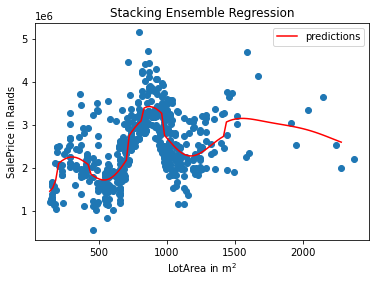

In [25]:
y_pred = s_reg.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# plot the stacking regression prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(s_reg.predict(x_domain))
x_rescaled = x_scaler.inverse_transform(x_domain) 

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("LotArea in m$^2$")
plt.ylabel("SalePrice in Rands")
plt.title("Stacking Ensemble Regression")
plt.legend()
plt.show()

And there you have it - our stacking ensemble achieves a better RMSE than the voting ensemble, however, it requires an extra training step to do so.

That's it for heterogeneous ensemble techniques, now lets investigate homogeneous ensembles. 

## Homogeneous Ensembles

These consist of the same type of model. As such, a common way to promote diversity in model performance in these cases is to control the number of predictors or portion of data supplied to each model in the ensemble. Much like what happens in a random forest.

Some the most common methods for combining models in this way include **bagging** and **boosting**.

### Bagging (AKA Bootstrap Aggregating)

Bagging involves training the models of the ensemble on different subsets of the training data. Particularly on subsets which are **sampled with replacement** from the training data. As such, the resulting 'bag' of models are together more stable due to decreased variance error. 

The predictions are made by aggregating the predictions of all the models in the bag.

In [26]:
from sklearn.ensemble import BaggingRegressor

First, we need to pick what base model to use in our bagging ensemble. 

In [27]:
# Instantiate decision tree regression model to use as the base model
d_tree = DecisionTreeRegressor(max_depth=4)
# Instantiate BaggingRegressor model with a decision tree as the base model
bag_reg = BaggingRegressor(base_estimator = d_tree)

In [28]:
bag_reg.fit(x_train,y_train[:,0])

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=4))

Check performance of our bagging regressor 

RMSE:  0.7626363922549754


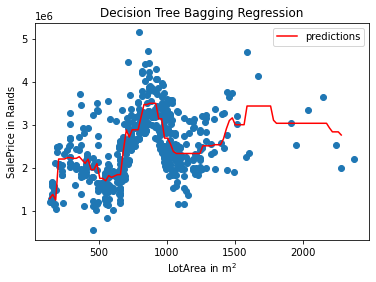

In [31]:
y_pred = bag_reg.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# plot the bagging regression prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(bag_reg.predict(x_domain))
x_rescaled = x_scaler.inverse_transform(x_domain) 

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("LotArea in m$^2$")
plt.ylabel("SalePrice in Rands")
plt.title("Decision Tree Bagging Regression")
plt.legend()
plt.show()

Try and run the above code cells a couple of times and observe that the RMSE error metric changes. This occurs due to the random sampling process that is used to build our ensemble, and as such, it's often good practice to manually set or record the `random_state` variable used to derive a specific result. This allows your work to be reproducible and easy to share with others.   

As the final ensemble method within our train, we now look at Boosting. 

## Boosting

Boosting ensembles are built by combining multiple 'weak models' (e.g. a decision tree with a depth of 1) in a sequential fashion. Each model is built from the previous model's training set. This training set is selected through weighted sampling (with replacement) where the weights are the previous model's prediction errors (e.g. residuals) on individual training samples.

The final predictions are then made by aggregating the individual predictions of all the models in the ensemble.

In [32]:
from sklearn.ensemble import AdaBoostRegressor

Like before, we need to pick what base model to use in our ensemble. 

In [33]:
# Instantiate decision tree regression model to use as the base model
d_tree = DecisionTreeRegressor(max_depth=3)
# Instantiate AdaBoostRegressor model with a decision tree as the base model
bst_reg = AdaBoostRegressor(base_estimator = d_tree)

In [34]:
bst_reg.fit(x_train,y_train[:,0])

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3))

Check performance of our boosting ensemble

RMSE:  0.781995077151198


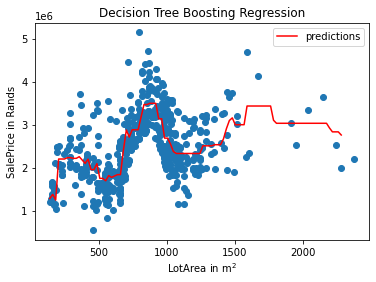

In [35]:
y_pred = bst_reg.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# plot the boosting regression prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(bag_reg.predict(x_domain))
x_rescaled = x_scaler.inverse_transform(x_domain) 

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("LotArea in m$^2$")
plt.ylabel("SalePrice in Rands")
plt.title("Decision Tree Boosting Regression")
plt.legend()
plt.show()

## Conclusion

There you have it. In this train we:

- Learnt about two major types of ensemble techniques, namely heterogeneous and homogeneous approaches. We also saw specific ensemble models within each of these areas, covering voting and stacking (heterogeneous), as well as bagging and boosting (homogeneous).
- Constructed the above mentioned ensemble models using `sklearn`, and observed their relative performance to one another. 
- Got a sneak peak of Support Vector Machines 

## Additional links
- [Decision tree regression with AdaBoost](https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html#sphx-glr-auto-examples-ensemble-plot-adaboost-regression-py)
- [A visual exploration of ensemble model decision boundaries](https://blog.statsbot.co/ensemble-learning-d1dcd548e936) 